In [80]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [81]:
import os
os.getcwd()


'/Users/maddi/Documents/secure_genomics_pipeline/notebooks'

In [82]:
#Load dataset
DATA_PATH = "../data/raw/GSE260586_FPKM+1.txt"

In [83]:
df = pd.read_csv(DATA_PATH, sep="\t")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (25384, 19)
  Chromosome      Start       Stop  Length Strand      Gene Symbol  \
0          X  100627108  100639992   12884      -  ENSG00000000003   
1         20   50934867   50959141   24274      -  ENSG00000000419   
2          1  169849631  169894268   44637      -  ENSG00000000457   
3          1  169662007  169854081  192074      +  ENSG00000000460   
4          1  196651754  196752477  100723      +  ENSG00000000971   

     gene_biotype          gene_id gene_name     gene_source  gene_version  \
0  protein_coding  ENSG00000000003    TSPAN6  ensembl_havana            16   
1  protein_coding  ENSG00000000419      DPM1  ensembl_havana            14   
2  protein_coding  ENSG00000000457     SCYL3  ensembl_havana            14   
3  protein_coding  ENSG00000000460  C1orf112  ensembl_havana            17   
4  protein_coding  ENSG00000000971       CFH  ensembl_havana            17   

       r542     r543     r544     r545      r546      r547     r548     r549  
0  1

In [84]:
#Column 7 is GeneID
gene_column = df.columns[7]

#Set GeneID as index
df = df.set_index(gene_column)

print("After setting GeneID as index:")
print(df.head())

#Drop metadata rows
metadata_rows = ['Chromosome', 'Start', 'Stop', 'Length', 'Strand', 'Gene Symbol', 'gene_biotype', 'gene_name', 'gene_source', 'gene_version']
df = df.drop(columns=metadata_rows)

print(df.head())

#Transpose so rows are samples and columns are genes
df_t = df.T

print("Transposed DataFrame shape:", df_t.shape)
print(df.T.head())

#Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_t)

print("Scaled data shape:", df_scaled.shape)

After setting GeneID as index:
                Chromosome      Start       Stop  Length Strand  \
gene_id                                                           
ENSG00000000003          X  100627108  100639992   12884      -   
ENSG00000000419         20   50934867   50959141   24274      -   
ENSG00000000457          1  169849631  169894268   44637      -   
ENSG00000000460          1  169662007  169854081  192074      +   
ENSG00000000971          1  196651754  196752477  100723      +   

                     Gene Symbol    gene_biotype gene_name     gene_source  \
gene_id                                                                      
ENSG00000000003  ENSG00000000003  protein_coding    TSPAN6  ensembl_havana   
ENSG00000000419  ENSG00000000419  protein_coding      DPM1  ensembl_havana   
ENSG00000000457  ENSG00000000457  protein_coding     SCYL3  ensembl_havana   
ENSG00000000460  ENSG00000000460  protein_coding  C1orf112  ensembl_havana   
ENSG00000000971  ENSG0000000097

In [85]:
# Run PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

print("Explained variance ratio by the 2 principal components:", pca.explained_variance_ratio_) #This might be a poor fit

Explained variance ratio by the 2 principal components: [0.32461786 0.25634072]


In [86]:
# Run PCA with 5 components
pca = PCA(n_components=5)
pca_result_5 = pca.fit_transform(df_scaled)

print("Explained variance ratio by the 5 principal components:", pca.explained_variance_ratio_) #The first two components still explain most of the variance

Explained variance ratio by the 5 principal components: [0.32461786 0.25634072 0.22959056 0.0645561  0.05743392]


Text(0.5, 1.0, 'PCA of GSE260586 Expression Data')

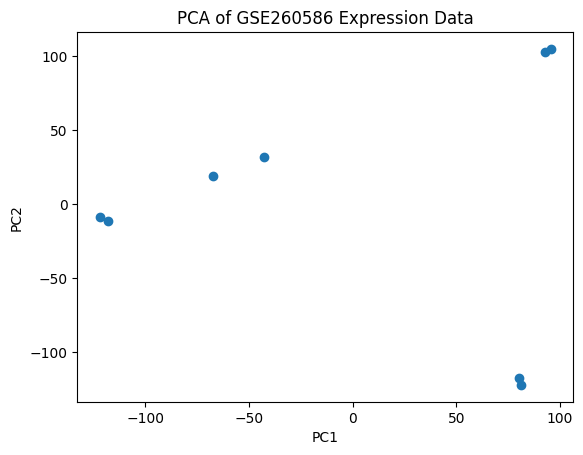

In [87]:
# Create PCA plot 
plt.figure()
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of GSE260586 Expression Data")

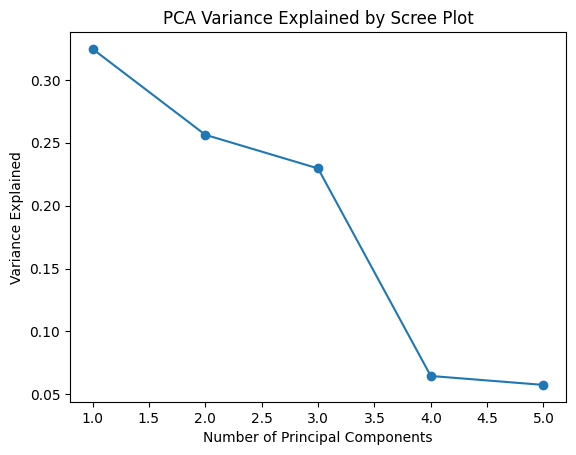

In [88]:
# Making an elbow plot to visualize variance explained by each principal component
import matplotlib.pyplot as plt
plt.plot(range(1, 6), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Variance Explained by Scree Plot')
plt.show() #It looks like the first 2-3 components explain most of the variance
